# 0. Imports

In [2]:
# Basic imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

import math

import datasus_dbc # Used to decompress the DBC file from DATASUS
import dbfread # Used to read the decompressed DBF

from IPython.core.display import HTML
from IPython.display import Image

In [3]:
# Set the option to display all columns in the DataFrame
pd.set_option('display.max_columns', None)

In [4]:
def jupyter_settings():
    %matplotlib inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

jupyter_settings()

# 1. Class RT_APAC

In [5]:
class RT_APAC:
      
    def concat_all_data(path_files, state): # Final dictionary to hold the results  

        # Create a full data DataFrame to hold all data
        full_data = pd.DataFrame()            
        
        # Path to the directory containing the DBC files
        path_files = os.path.join(path_files, state)  # Adjust the path as needed

        # Check all paths in the directory
        for path in os.listdir(path_files):

            # Create an empty DataFrame to hold all data
            all_data = pd.DataFrame()

            # Print the path being processed
            print("Processing path:", path, end=' from -> ')            

            # Construct the full path to the directory            
            path_destiny = os.path.join(path_files, path)
            print(path_destiny)            
        
            # Check all files in the path
            try:
                for file in os.listdir(path_destiny):                
                
                    # Construct the full path to the file
                    file_to_read = os.path.join(path_destiny, file)   
                
                    # Decompress the DBC file to a temporary DBF file
                    datasus_dbc.decompress(file_to_read, "output.dbf")

                    # Read the decompressed DBF file using dbfread
                    dbf = dbfread.DBF('output.dbf', encoding='latin1')
                    #df = pd.DataFrame(iter(dbf))

                    # Now you can work with the DataFrame
                    df = pd.DataFrame(iter(dbf))  # Convert to DataFrame

                    for col in df.columns:
                        # Convert columns to string type
                        df[col] = df[col].astype(str)                

                    # Concatenate the DataFrame to the main DataFrame                
                    all_data = pd.concat([all_data, df], ignore_index=True)            
                
                    # Construct the full path to save the CSV file
                    csv_destiny = os.path.join(path_files, f"{path}.csv") 
            except NotADirectoryError:
                print(f"Error: {path_destiny} is not a directory or does not exist.")
                pass               
        
            # Concatenate the all_data DataFrame to the full_data DataFrame
            full_data = pd.concat([full_data, all_data], ignore_index=True)
        

        # Save the full_data DataFrame to a CSV file
        csv_destiny = os.path.join(path_files, f"{state}.csv")
        full_data.to_csv(csv_destiny, index=False)

In [7]:
data = RT_APAC.concat_all_data("C:\\Users\\175 MX\\Documents\\Gustavo\\datasus\\files\\data_rt_states\\states\\", "sp")

Processing path: 08 from -> C:\Users\175 MX\Documents\Gustavo\datasus\files\data_rt_states\states\sp\08
Processing path: 09 from -> C:\Users\175 MX\Documents\Gustavo\datasus\files\data_rt_states\states\sp\09
Processing path: 10 from -> C:\Users\175 MX\Documents\Gustavo\datasus\files\data_rt_states\states\sp\10
Processing path: 11 from -> C:\Users\175 MX\Documents\Gustavo\datasus\files\data_rt_states\states\sp\11
Processing path: 12 from -> C:\Users\175 MX\Documents\Gustavo\datasus\files\data_rt_states\states\sp\12
Processing path: 13 from -> C:\Users\175 MX\Documents\Gustavo\datasus\files\data_rt_states\states\sp\13
Processing path: 14 from -> C:\Users\175 MX\Documents\Gustavo\datasus\files\data_rt_states\states\sp\14
Processing path: 15 from -> C:\Users\175 MX\Documents\Gustavo\datasus\files\data_rt_states\states\sp\15
Processing path: 16 from -> C:\Users\175 MX\Documents\Gustavo\datasus\files\data_rt_states\states\sp\16
Processing path: 17 from -> C:\Users\175 MX\Documents\Gustavo\da

# 2. Loading Data

In [7]:
data = pd.read_csv("C:\\Users\\175 MX\\Documents\\Gustavo\\datasus\\files\\data_rt_states\\states\\sp\\sp.csv", encoding='latin1')

C:\Users\175 MX\AppData\Local\Temp\ipykernel_5544\51953938.py:1: DtypeWarning: Columns (37,41,43,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:\\Users\\175 MX\\Documents\\Gustavo\\datasus\\files\\data_rt_states\\states\\sp\\sp.csv", encoding='latin1')


In [10]:
data.head()

,AP_MVM,AP_CONDIC,AP_GESTAO,AP_CODUNI,AP_AUTORIZ,AP_CMP,AP_PRIPAL,AP_VL_AP,AP_UFMUN,AP_TPUPS,AP_TIPPRE,AP_MN_IND,AP_CNPJCPF,AP_CNPJMNT,AP_CNSPCN,AP_COIDADE,AP_NUIDADE,AP_SEXO,AP_RACACOR,AP_MUNPCN,AP_UFNACIO,AP_CEPPCN,AP_UFDIF,AP_MNDIF,AP_DTINIC,AP_DTFIM,AP_TPATEN,AP_TPAPAC,AP_MOTSAI,AP_OBITO,AP_ENCERR,AP_PERMAN,AP_ALTA,AP_TRANSF,AP_DTOCOR,AP_CODEMI,AP_CATEND,AP_APACANT,AP_UNISOL,AP_DTSOLIC,AP_DTAUT,AP_CIDCAS,AP_CIDPRI,AP_CIDSEC,AP_ETNIA,AR_SMRD,AR_CID10,AR_LINFIN,AR_ESTADI,AR_GRAHIS,AR_DTIDEN,AR_TRANTE,AR_CIDINI1,AR_DTINI1,AR_CIDINI2,AR_DTINI2,AR_CIDINI3,AR_DTINI3,AR_CONTTR,AR_DTINTR,AR_FINALI,AR_CIDTR1,AR_CIDTR2,AR_CIDTR3,AR_NUMC1,AR_INIAR1,AR_INIAR2,AR_INIAR3,AR_FIMAR1,AR_FIMAR2,AR_FIMAR3,AR_NUMC2,AR_NUMC3,AP_NATJUR,year
0,200801,EP,350000,2030705,3508205721108,200801,304010090.0,744.16,354140,39,20,I,51397248000179,NaN,|{ÂÂ|{ÂÂÂÂ}{{{Â,4,65,M,1,354240,10,19570000,0,1,20080102,20080331,4,1,21,0,0,1,0,0,NaN,E350000016,NaN,0.0,0.0,20080102.0,NaN,0000,C12,0000,NaN,NaN,C12,3,3.0,G3,20071105,N,NaN,NaN,NaN,NaN,NaN,NaN,S,20080102,1,C12,C770,NaN,72.0,20080102.0,20080102.0,NaN,20080228.0,20080207.0,NaN,21.0,0.0,NaN,2008
1,200801,EP,350000,2025507,3508205573565,200801,304010090.0,749.64,352900,5,61,M,9161265000146,9.161265e+12,ÂÂÂ{{|}Â}}Â}|,4,51,F,99,352900,10,17514691,0,1,20080123,20080331,4,1,21,0,0,1,0,0,NaN,E350000029,1.0,0.0,2025507.0,20080123.0,20080123.0,0000,C56,0000,NaN,NaN,C56,S,4.0,00,20071120,NaN,C772,20080115.0,C774,20080116.0,NaN,NaN,N,20080115,5,C772,C774,NaN,36.0,20080123.0,20080123.0,NaN,20080331.0,20080331.0,NaN,36.0,NaN,NaN,2008
2,200801,EP,350000,2030705,3508205718842,200801,304010090.0,1475.80,354140,39,20,I,51397248000179,NaN,ÂÂÂ{{||{Â|~ÂÂÂ,4,80,M,1,354140,10,19015320,0,1,20080102,20080331,4,1,21,0,0,1,0,0,NaN,E350000016,NaN,0.0,0.0,20080102.0,NaN,0000,C61,0000,NaN,NaN,C61,3,4.0,G2,20070423,N,NaN,NaN,NaN,NaN,NaN,NaN,S,20080102,5,C61,NaN,NaN,116.0,20080102.0,NaN,NaN,20080220.0,NaN,NaN,0.0,0.0,NaN,2008
3,200801,EP,350000,2773171,3508204191613,200801,304010286.0,731.64,353060,39,20,I,48095202000190,NaN,ÂÂÂ{{{{ÂÂÂ|}ÂÂ,4,53,M,1,353060,10,8738120,0,1,20080101,20080331,4,1,21,0,0,1,0,0,NaN,E350000027,NaN,0.0,0.0,NaN,NaN,0000,C710,0000,NaN,NaN,C710,3,NaN,GX,20070827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,20071204,1,C710,NaN,NaN,70.0,20080101.0,NaN,NaN,20080331.0,NaN,NaN,0.0,0.0,NaN,2008
4,200801,EP,350000,2773171,3508204191712,200801,304010294.0,396.00,353060,39,20,I,48095202000190,NaN,Â{|~|ÂÂÂ{Â,4,52,M,1,351880,35,7181140,0,1,20080101,20080331,4,1,21,0,0,1,0,0,NaN,E350000027,NaN,0.0,0.0,NaN,NaN,0000,C61,0000,NaN,NaN,C61,3,3.0,G2,20060104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,20071130,1,C61,NaN,NaN,140.0,20080101.0,NaN,NaN,20080331.0,NaN,NaN,0.0,0.0,NaN,2008


In [8]:
data['year'] = data['AP_MVM'].apply(lambda x: str(x)[:4])
data['year'] = data['year'].astype(int)

In [13]:
aux = data[data['AP_CODUNI'] == 2081482].reset_index(drop=True)

In [22]:
aux.head()

,AP_MVM,AP_CONDIC,AP_GESTAO,AP_CODUNI,AP_AUTORIZ,AP_CMP,AP_PRIPAL,AP_VL_AP,AP_UFMUN,AP_TPUPS,AP_TIPPRE,AP_MN_IND,AP_CNPJCPF,AP_CNPJMNT,AP_CNSPCN,AP_COIDADE,AP_NUIDADE,AP_SEXO,AP_RACACOR,AP_MUNPCN,AP_UFNACIO,AP_CEPPCN,AP_UFDIF,AP_MNDIF,AP_DTINIC,AP_DTFIM,AP_TPATEN,AP_TPAPAC,AP_MOTSAI,AP_OBITO,AP_ENCERR,AP_PERMAN,AP_ALTA,AP_TRANSF,AP_DTOCOR,AP_CODEMI,AP_CATEND,AP_APACANT,AP_UNISOL,AP_DTSOLIC,AP_DTAUT,AP_CIDCAS,AP_CIDPRI,AP_CIDSEC,AP_ETNIA,AR_SMRD,AR_CID10,AR_LINFIN,AR_ESTADI,AR_GRAHIS,AR_DTIDEN,AR_TRANTE,AR_CIDINI1,AR_DTINI1,AR_CIDINI2,AR_DTINI2,AR_CIDINI3,AR_DTINI3,AR_CONTTR,AR_DTINTR,AR_FINALI,AR_CIDTR1,AR_CIDTR2,AR_CIDTR3,AR_NUMC1,AR_INIAR1,AR_INIAR2,AR_INIAR3,AR_FIMAR1,AR_FIMAR2,AR_FIMAR3,AR_NUMC2,AR_NUMC3,AP_NATJUR,year
0,200801,EP,350000,2081482,3508208700920,200801,304010286.0,1377.12,350950,7,61,I,50046887000127,NaN,|{Â~Â|ÂÂÂÂ}{{{Â,4,53,M,1,352340,10,13251000,0,1,20080111,20080331,4,1,21,0,0,1,0,0,NaN,E350000012,1.0,0.0,2081482.0,20080111.0,20080129.0,0000,C61,0000,NaN,NaN,C61,N,2.0,X,20051128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,20080111,1,C61,NaN,NaN,140.0,20080104.0,NaN,NaN,20080221.0,NaN,NaN,NaN,NaN,NaN,2008
1,200801,EP,350000,2081482,3508208704671,200801,304010286.0,3153.96,350950,7,61,I,50046887000127,NaN,ÂÂÂ{{|{}ÂÂÂÂÂÂÂ,4,66,M,1,350160,10,13465000,0,1,20080131,20080331,4,1,21,0,0,1,0,0,NaN,E350000012,1.0,0.0,2081482.0,20080123.0,20080131.0,0000,C61,0000,NaN,NaN,C61,N,2.0,X0,20060220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,20080123,1,C61,NaN,NaN,172.0,20071121.0,NaN,NaN,20080110.0,NaN,NaN,NaN,NaN,NaN,2008
2,200801,EP,350000,2081482,3508208704913,200801,304010286.0,1655.84,350950,7,61,I,50046887000127,NaN,ÂÂÂ{{{|Â~Â|ÂÂÂ,4,63,M,1,350950,10,13088603,0,1,20080124,20080331,4,1,21,0,0,1,0,0,NaN,E350000012,1.0,0.0,2081482.0,20080124.0,20080131.0,0000,C61,0000,NaN,NaN,C61,N,2.0,X,20061031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,20080124,1,C61,NaN,NaN,148.0,20071230.0,NaN,NaN,20071219.0,NaN,NaN,NaN,NaN,NaN,2008
3,200801,EP,350000,2081482,3508208687930,200801,304010286.0,1377.12,350950,7,61,I,50046887000127,NaN,ÂÂÂ{{{|Â}|ÂÂ{ÂÂ,4,51,M,2,350950,10,13030710,0,1,20080108,20080331,4,1,21,0,0,1,0,0,NaN,E350000012,1.0,0.0,2081482.0,20080108.0,20080123.0,0000,C61,0000,NaN,NaN,C61,N,3.0,2,20071215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,20080108,1,C61,NaN,NaN,140.0,20071219.0,NaN,NaN,20080205.0,NaN,NaN,NaN,NaN,NaN,2008
4,200801,EP,350000,2081482,3508208704627,200801,304010286.0,1655.84,350950,7,61,I,50046887000127,NaN,ÂÂÂ{{{|{|ÂÂÂ}|Â,4,72,M,1,355620,10,13270000,0,1,20080123,20080331,4,1,21,0,0,1,0,0,NaN,E350000012,1.0,0.0,2081482.0,20080123.0,20080131.0,0000,C61,0000,NaN,NaN,C61,N,2.0,X,20080619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,20080123,1,C61,NaN,NaN,172.0,20071205.0,NaN,NaN,20080125.0,NaN,NaN,NaN,NaN,NaN,2008


In [ ]:
aux[['year', 'AP_VL_AP']].groupby('year').mean().reset_index().sort_values(by='year', ascending=True)

,year,AP_VL_AP
0,2008,1408.010660
1,2009,1295.989535
2,2010,1399.796678
3,2011,1981.005172
4,2012,2021.437223
5,2013,2074.629747
6,2014,2054.757787
7,2015,2137.295063
8,2016,2232.156660
9,2017,2217.754881


In [23]:
aux[['year', 'AP_VL_AP']].groupby('year').sum().reset_index().sort_values(by='year', ascending=True)

,year,AP_VL_AP
0,2008,1664268.60
1,2009,1226006.10
2,2010,3177538.46
3,2011,4213598.00
4,2012,4105539.00
5,2013,3933498.00
6,2014,3825959.00
7,2015,3723168.00
8,2016,3234395.00
9,2017,4089540.00


In [17]:
aux[["cid10", "AP_VL_AP"]].groupby("cid10").mean().sort_values(by="AP_VL_AP", ascending=False).head(10)

,AP_VL_AP
cid10,
C50,5905.036602
C61,5737.444468
Q28,5035.000000
D33,4753.880000
C60,4630.000000
C51,4608.000000
C55,4608.000000
D39,4608.000000
nan,4527.012253


<Axes: xlabel='year', ylabel='AP_VL_AP'>

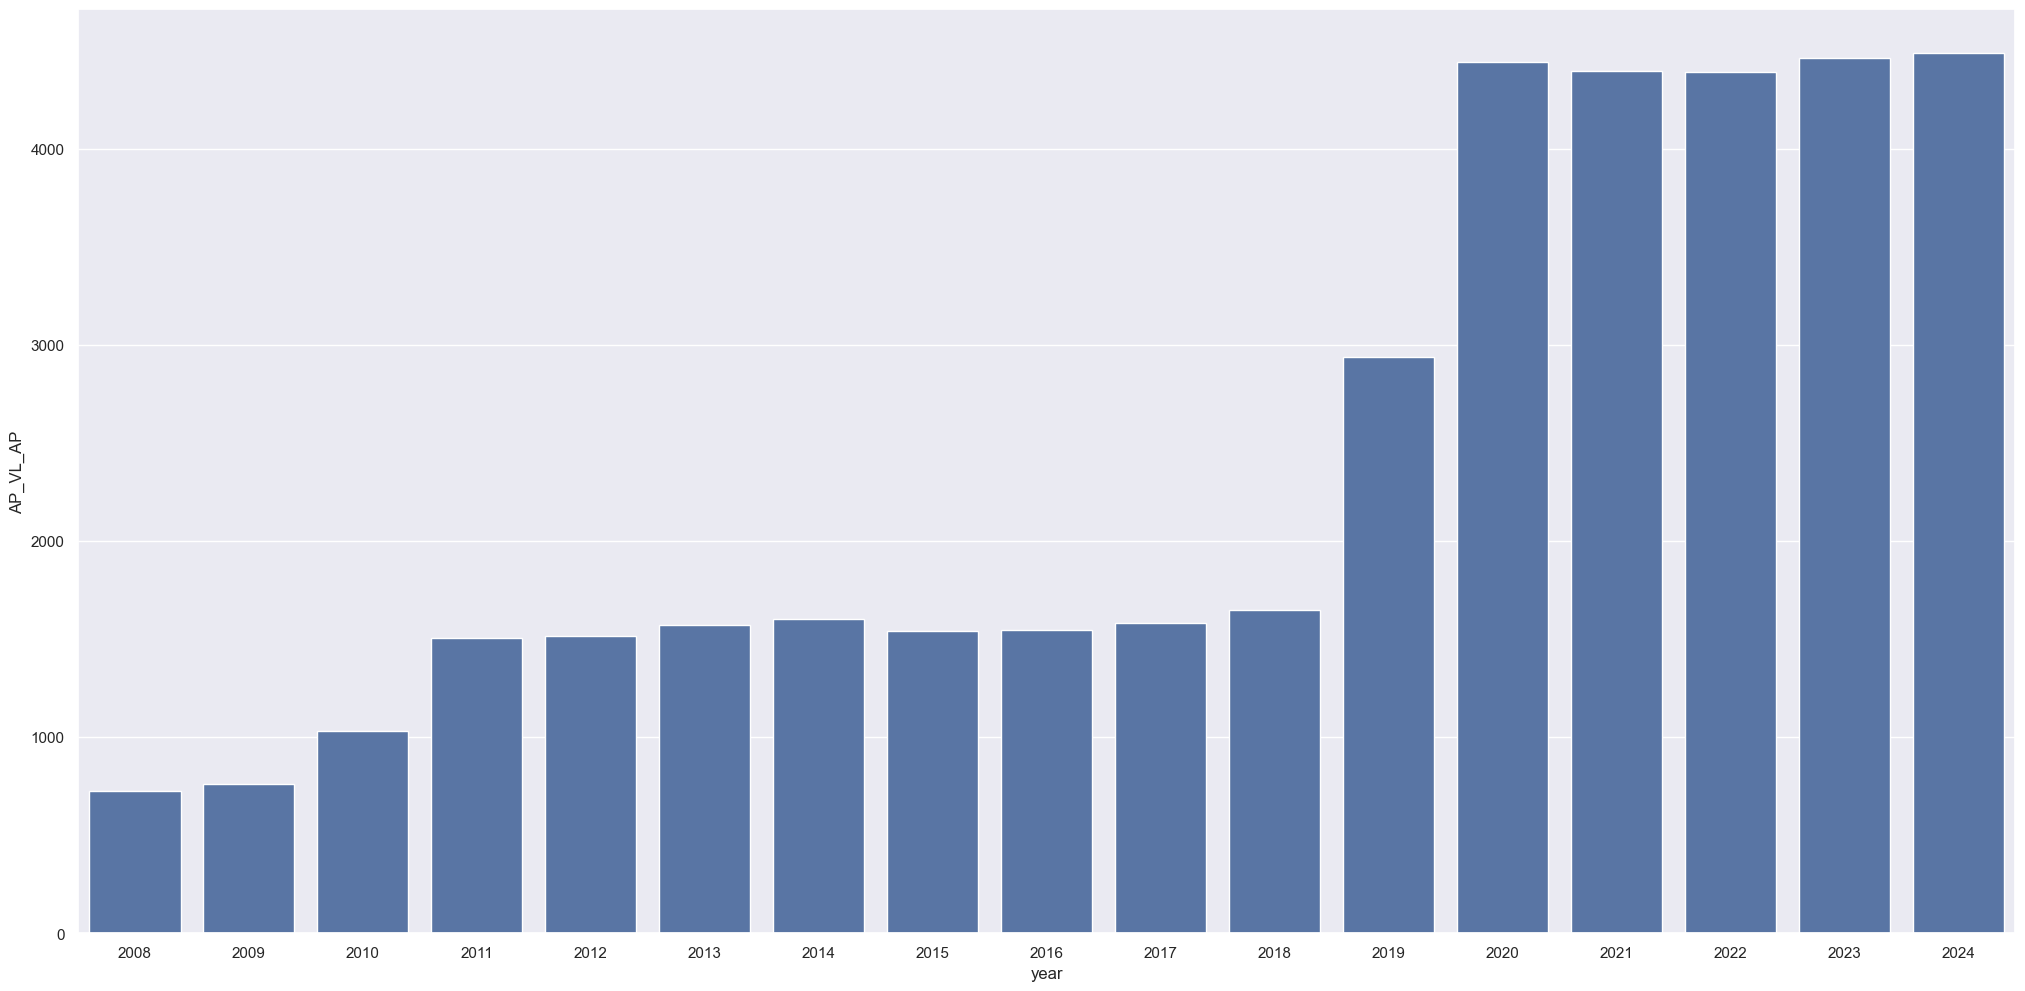

In [115]:
aux = data[['year', 'AP_VL_AP']].groupby('year').mean().reset_index().sort_values(by='year')
sns.barplot(data=aux, x='year', y='AP_VL_AP')

<Axes: xlabel='year', ylabel='AP_VL_AP'>

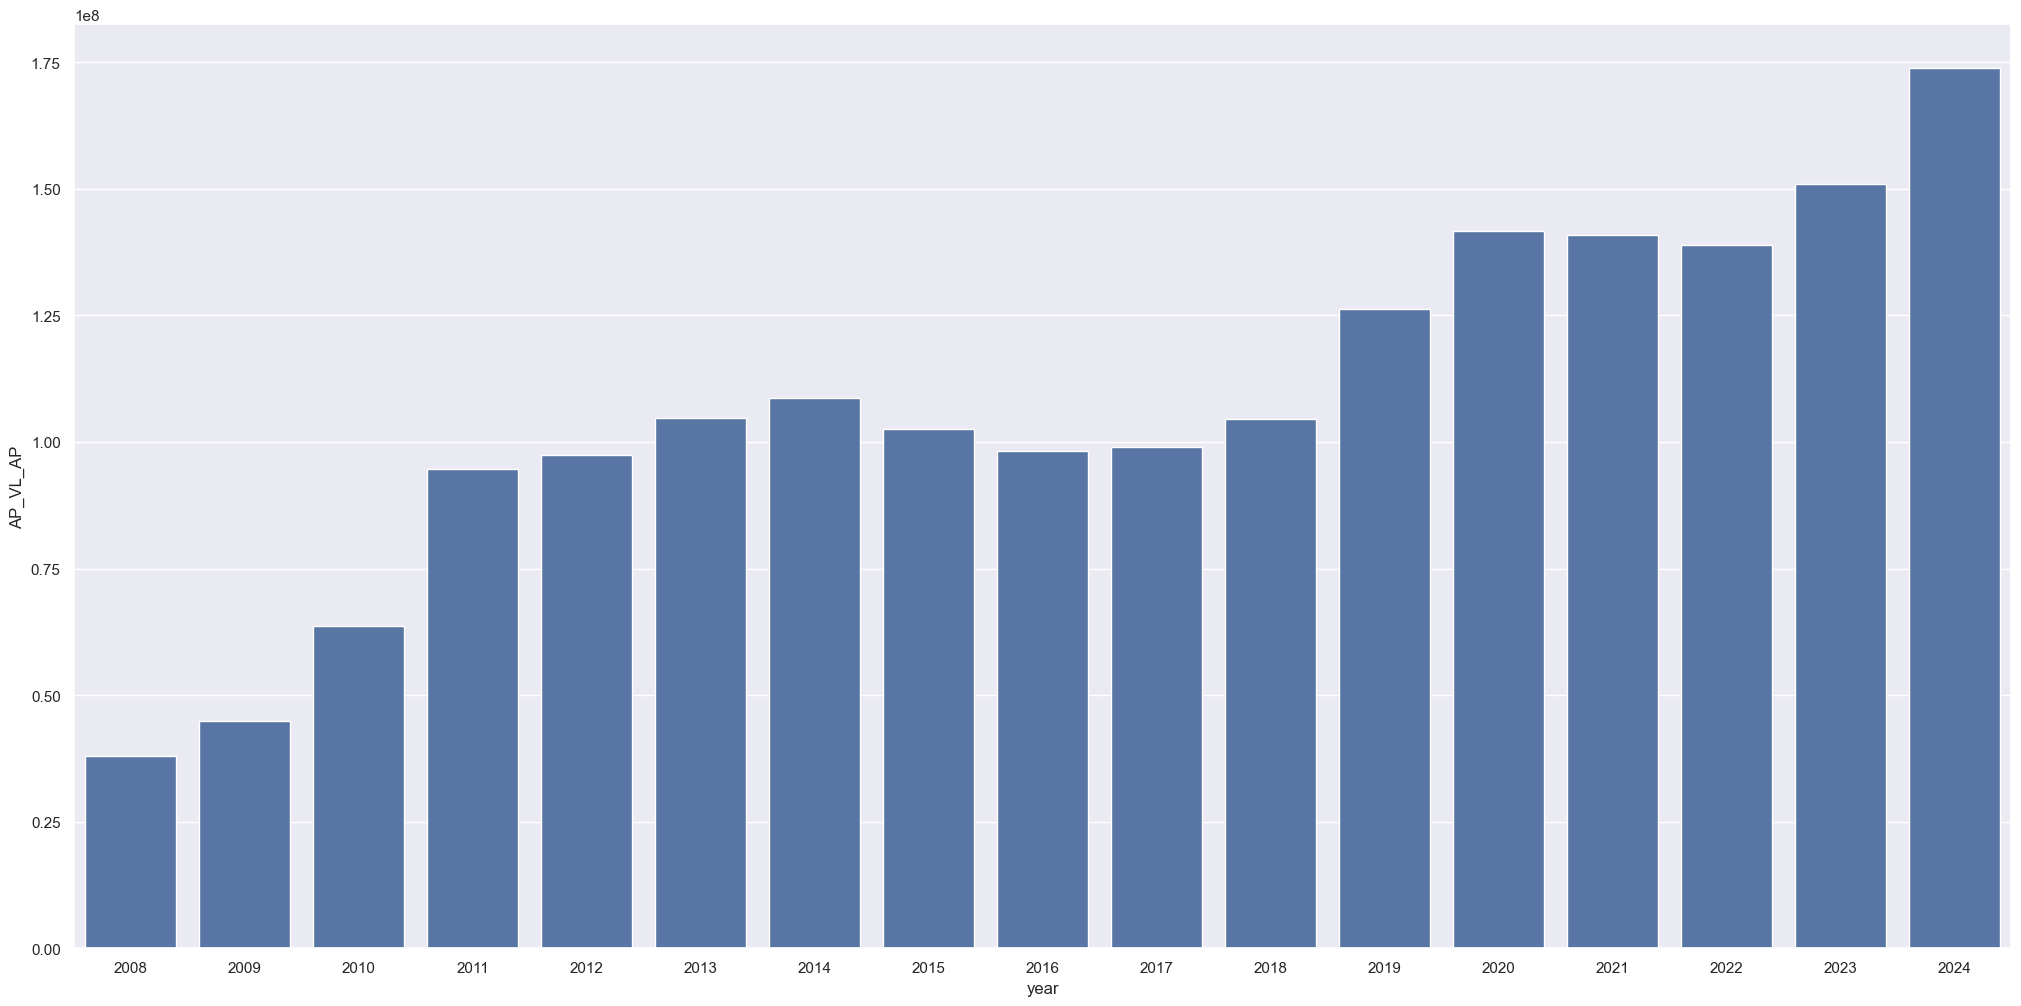

In [18]:
aux = data[['year', 'AP_VL_AP']].groupby('year').sum().reset_index().sort_values(by='year')
sns.barplot(data=aux, x='year', y='AP_VL_AP')

In [19]:
aux

,year,AP_VL_AP
0,2008,3.805517e+07
1,2009,4.480988e+07
2,2010,6.357965e+07
3,2011,9.461865e+07
4,2012,9.742722e+07
5,2013,1.047867e+08
6,2014,1.086925e+08
7,2015,1.025519e+08
8,2016,9.824792e+07
9,2017,9.894560e+07


In [21]:
# change percentage year by year
aux['percentage'] = aux['AP_VL_AP'].pct_change().fillna(0)
aux['percentage'] = aux['percentage'] * 100

In [22]:
aux

,year,AP_VL_AP,percentage
0,2008,3.805517e+07,0.000000
1,2009,4.480988e+07,17.749791
2,2010,6.357965e+07,41.887580
3,2011,9.461865e+07,48.819078
4,2012,9.742722e+07,2.968308
5,2013,1.047867e+08,7.553839
6,2014,1.086925e+08,3.727318
7,2015,1.025519e+08,-5.649522
8,2016,9.824792e+07,-4.196829
9,2017,9.894560e+07,0.710119


In [ ]:
# Increase (percentage) year by year
aux['AP_VL_AP'] = aux['AP_VL_AP'].astype(float)
aux['AP_VL_AP'] = aux['AP_VL_AP'].fillna(0
aux['percent'] = aux['AP_VL_AP'] / aux['AP_VL_AP'].sum() * 100